In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
import pickle
import os

# Simulation erneuern
path = os.getcwd()+"\\Simulationsergebnisse\\Simulation_Results_3_250k_CS1.pickle"
df = pickle.load(open(path, 'rb'))

In [190]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,4,1201.0,80,1225.0,24.0,7.57,7,100.0,95.0,NaN,NaN
1,0.2,2,4,3,1232.0,82,1233.0,1.0,0.35,24,95.0,94.8,NaN,NaN
2,0.3,3,3,4,1257.0,84,1282.0,25.0,7.89,146,94.8,89.6,NaN,NaN
3,0.4,4,4,1,1428.0,95,42.0,54.0,17.21,121,89.6,78.2,42.0,130.0
4,1.1,1,1,4,1116.0,74,1117.0,1.0,0.47,1138,100.0,99.9,NaN,NaN


In [183]:
# initialisieren Liste 
cars_charging = [0 for i in range(1441)]

In [184]:
# Fahrten auf solche mit anschließendem Ladevorgang filtern
filt = df["Charge_start"].notnull()
df_filt = df[filt]

In [185]:
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
3,0.4,4,4,1,1428.0,95,42.0,54.0,17.21,121,89.6,78.2,42.0,130.0
10,3.5,5,3,1,1305.0,87,1331.0,26.0,8.36,1010,79.0,76.7,1331.0,174.0
12,4.2,2,4,1,1080.0,72,1177.0,97.0,30.61,25,97.9,89.3,1177.0,1202.0
14,4.4,4,3,1,1241.0,83,1252.0,11.0,3.45,1078,90.4,89.5,1252.0,1337.0
16,5.2,2,2,1,785.0,52,813.0,28.0,8.82,970,96.2,91.8,813.0,849.0


In [186]:
# reduzierte Liste neu indizieren
df_filt.reset_index(drop=True, inplace=True)
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.4,4,4,1,1428.0,95,42.0,54.0,17.21,121,89.6,78.2,42.0,130.0
1,3.5,5,3,1,1305.0,87,1331.0,26.0,8.36,1010,79.0,76.7,1331.0,174.0
2,4.2,2,4,1,1080.0,72,1177.0,97.0,30.61,25,97.9,89.3,1177.0,1202.0
3,4.4,4,3,1,1241.0,83,1252.0,11.0,3.45,1078,90.4,89.5,1252.0,1337.0
4,5.2,2,2,1,785.0,52,813.0,28.0,8.82,970,96.2,91.8,813.0,849.0


In [187]:
# erhöhen des cars_charging Zähler um 1 für jeden Ladevorgang zwischen Charge_start und Charge_end
for i in range(len(df_filt)):
    if df_filt.at[i, "Charge_start"] < df_filt.at[i, "Charge_end"]:
        for j in range(int(df_filt.at[i, "Charge_start"]), int(df_filt.at[i, "Charge_end"]) + 1):
            cars_charging[j] += 1
    else: 
        for j in range(int(df_filt.at[i, "Charge_start"]), 1441):
            cars_charging[j] += 1
        for j in range(0, int(df_filt.at[i, "Charge_end"])):
            cars_charging[j] += 1

In [188]:
# normieren des Ergebnis auf Anzahl simulierter Fahrzeuge
# ACHTUNG: Wert anpassen, bei Anpassung der Simulation (Globalvariable in Ergebnis speichern und hier über Variable definieren?)
relative_cars_charging = [x/250000 for x in cars_charging]

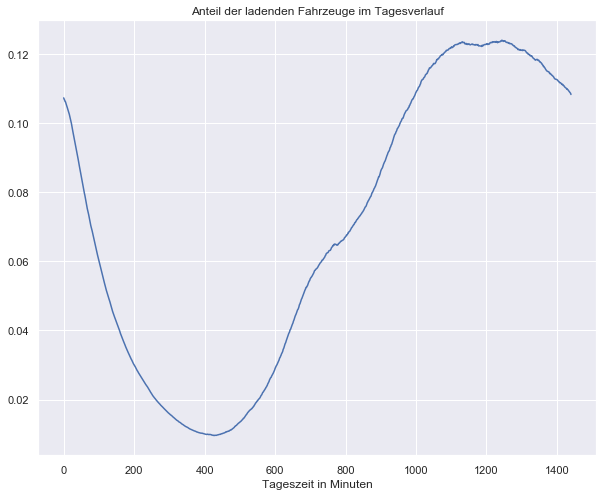

In [189]:
# Visualisieren
sns.set()
plt.figure(figsize=(10,8))
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf")
plt.xlabel("Tageszeit in Minuten")
plt.plot(x, relative_cars_charging);